# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images

### Importing necessary libraries

In [97]:
import numpy as np
import pandas as pd
import os
import string

### Reading the dataset

In [98]:
dataset = pd.read_csv("Flavia_features.csv")

In [99]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,561342.5,3305.416635,1353,640,2.114063,1.542588,19.463659,189.181341,218.805668,179.584394,96.015825,50.316477,108.842002,58.808041,0.994066,0.727757,4.745328
1,0,607171.0,3988.447285,1466,1034,1.417795,2.496569,26.199723,15.476080,38.971083,9.930136,36.154020,60.875630,27.024367,29.127809,0.997869,0.725346,4.997369
2,0,842969.5,4278.504949,1378,843,1.634638,1.378050,21.715619,35.406194,56.211548,33.102664,45.685167,65.068653,43.953746,29.547815,0.997531,0.647207,6.183285
3,0,785547.0,4419.472546,1242,1068,1.162921,1.688576,24.863869,37.360262,77.987583,8.228920,48.897957,92.566737,27.841885,5.518959,0.999238,0.747937,5.233228
4,0,880922.5,4248.661363,1336,1007,1.326713,1.527208,20.491159,43.304093,72.965296,27.219854,53.980806,78.973875,39.895113,27.960254,0.997040,0.618811,6.441511


In [100]:
type(dataset)

pandas.core.frame.DataFrame

In [101]:
#aindir = 'Plant-Leaf-Identification-master'
ds_path ="Leaves"
img_files = os.listdir(ds_path)

### Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are specified in Flavia leaves dataset website.

In [102]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

In [103]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [104]:
y = np.array(target_list)
y

array([13, 25, 27, ..., 10,  8, 22])

In [105]:
X = dataset.iloc[:,1:]

In [106]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,561342.5,3305.416635,1353,640,2.114063,1.542588,19.463659,189.181341,218.805668,179.584394,96.015825,50.316477,108.842002,58.808041,0.994066,0.727757,4.745328
1,607171.0,3988.447285,1466,1034,1.417795,2.496569,26.199723,15.476080,38.971083,9.930136,36.154020,60.875630,27.024367,29.127809,0.997869,0.725346,4.997369
2,842969.5,4278.504949,1378,843,1.634638,1.378050,21.715619,35.406194,56.211548,33.102664,45.685167,65.068653,43.953746,29.547815,0.997531,0.647207,6.183285
3,785547.0,4419.472546,1242,1068,1.162921,1.688576,24.863869,37.360262,77.987583,8.228920,48.897957,92.566737,27.841885,5.518959,0.999238,0.747937,5.233228
4,880922.5,4248.661363,1336,1007,1.326713,1.527208,20.491159,43.304093,72.965296,27.219854,53.980806,78.973875,39.895113,27.960254,0.997040,0.618811,6.441511


In [107]:
y[0:5]

array([13, 25, 27, 30, 27])

### Train test split

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

In [110]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
147,521832.0,3421.624783,1325,750,1.766667,1.904349,22.435412,25.145989,43.483646,18.288711,43.192509,70.648708,32.760250,23.805489,0.996622,0.765862,3.903513
837,445611.5,3127.603372,1345,491,2.739308,1.481997,21.951639,28.813562,41.238844,24.769416,53.014815,72.667816,47.850563,4.536452,0.999111,0.832498,3.094244
358,273135.0,3578.839206,1360,968,1.404959,4.819888,46.892892,9.454536,18.897390,7.205166,27.927726,46.166477,25.895909,15.086292,0.997765,0.877027,2.195806
962,930656.5,4394.381268,1573,1101,1.428701,1.860915,20.749424,38.521936,71.400802,26.599452,42.709538,73.632868,31.900836,29.674007,0.997089,0.631512,5.890913
1101,57919.5,3681.625990,1460,915,1.595628,23.064771,234.020838,4.730785,6.425614,3.695089,26.800020,33.104585,24.408917,5.916679,0.995190,0.964529,0.766046


In [111]:
y_train[0:5]

array([ 8,  2,  0, 12, 16])

### Feature Scaling

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [114]:
X_train[0:2]

array([[-0.30112142, -0.39395126,  0.04701906, -0.54632792,  0.27024633,
        -0.23733069, -0.26725312, -0.29907977, -0.38004552, -0.25700385,
        -0.16845227,  0.05727142, -0.2551481 , -0.1049842 , -0.08910352,
         0.19772908, -0.33092877],
       [-0.58899701, -0.77815381,  0.13163751, -1.6467102 ,  1.8811622 ,
        -0.33174965, -0.27856357, -0.20320814, -0.43016703, -0.07999576,
         0.43151122,  0.17340198,  0.4927021 , -0.85874136,  1.12369569,
         0.85560919, -0.82649735]])

In [115]:
y_train[0:2]

array([8, 2])

### Applying SVM classifier model

In [116]:
from sklearn import svm

In [117]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [118]:
y_pred = clf.predict(X_test)

In [119]:
from sklearn import metrics

In [120]:
metrics.accuracy_score(y_test, y_pred)

0.8097731239092496

In [121]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.64      0.52        11
           1       0.88      0.88      0.88        25
           2       0.90      0.95      0.92        19
           3       0.79      1.00      0.88        23
           4       0.94      1.00      0.97        16
           5       0.91      1.00      0.95        20
           6       0.65      0.87      0.74        15
           7       0.92      0.88      0.90        25
           8       0.63      0.71      0.67        17
           9       1.00      0.94      0.97        16
          10       0.53      0.62      0.57        16
          11       0.82      0.82      0.82        17
          12       0.55      0.73      0.63        15
          13       1.00      0.73      0.84        26
          14       0.73      0.40      0.52        20
          15       0.60      0.38      0.46        16
          16       1.00      1.00      1.00        26
          17       0.94    

### Performing parameter tuning of the model

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [124]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

/home/ritvik/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [125]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [126]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.043 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.187 (+/-0.019) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.600 (+/-0.026) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.824 (+/-0.046) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.852 (+/-0.037) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.846 (+/-0.046) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.190 (+/-0.014) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.601 (+/-0.032) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.828 (+/-0.034) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.884 (+/-0.058) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.876 (+/-0.055) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.861 (+/-0.042) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.601 (+/-0.032) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.817 (+/-0.028) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.888 (+/-0.025) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.887 (+/-0.052) for {'C': 100, 'gamma': 0.1, 'kernel':

In [127]:
y_pred_svm = svm_clf.predict(X_test)

In [128]:
metrics.accuracy_score(y_test, y_pred_svm)

0.8900523560209425

In [129]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        11
           1       0.88      0.88      0.88        25
           2       0.89      0.89      0.89        19
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        16
           5       0.95      1.00      0.98        20
           6       0.74      0.93      0.82        15
           7       0.89      1.00      0.94        25
           8       0.74      0.82      0.78        17
           9       1.00      1.00      1.00        16
          10       0.79      0.94      0.86        16
          11       0.76      0.94      0.84        17
          12       0.92      0.80      0.86        15
          13       0.95      0.77      0.85        26
          14       0.75      0.90      0.82        20
          15       0.81      0.81      0.81        16
          16       1.00      1.00      1.00        26
          17       0.94    

### Dimensionality Reduction using PCA

In [130]:
from sklearn.decomposition import PCA

In [131]:
pca = PCA()

In [132]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [133]:
var= pca.explained_variance_ratio_
var

array([9.99992897e-01, 6.41437088e-06, 3.92824605e-07, 2.08042079e-07,
       6.15524137e-08, 1.38782130e-08, 8.94941027e-09, 2.51985112e-09,
       8.66427495e-10, 2.10140472e-10, 1.07067483e-10, 1.32409779e-11,
       2.22566009e-12, 1.41983634e-12, 5.16455582e-13, 3.39148727e-15,
       1.00670612e-17])

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

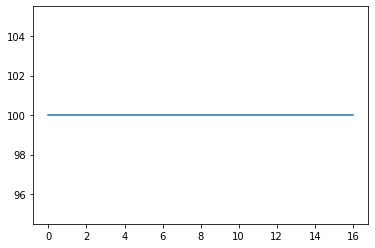

In [135]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

### Testing with mobile captured leaves which are not classified

In [136]:
import os
import cv2

In [137]:
def bg_sub(filename):
    #test_img_path = '..\\mobile captures\\' + filename
    test_img_path = filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    ret_image, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [138]:
# filename = 'mobile_test.png' 
filename = '1056.jpg'
bg_rem_img = bg_sub(filename)

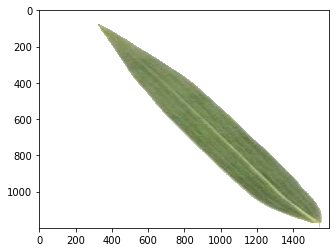

In [139]:
plt.imshow(bg_rem_img)

In [140]:
import mahotas as mt

In [141]:
def feature_extract(img):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    image, contours, _ = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

In [142]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,295733.0,3490.059563,1226,1091,1.12374,4.522884,41.187543,19.822591,22.401918,15.200409,46.153154,51.874727,35.853513,6.61005,0.99845,0.921209,2.048229


In [143]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[-1.15506993 -0.30452643 -0.37184226  0.90243793 -0.79458788  0.34805726
   0.17116506 -0.43823522 -0.85075424 -0.34135494  0.01238909 -1.02252841
  -0.10185125 -0.77762735  0.80192887  1.73143426 -1.46704134]]


20

In [144]:
common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','Bambusoideae','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
common_names[y_pred_mobile[0]]

'Bambusoideae'